In [82]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.fftpack import fft, ifft, fftshift
from math import pi

In [93]:
class AudioSpec():
    def __init__(self, file):
        self.wf = wave.open(file, 'rb')
        self.data = self.wf.readframes(-1)
        self.data = np.fromstring(self.data, 'Int16')
        
    def time_spec(self):
        len1 = len(self.data)
        self.t = np.arange(0, len1)
        self.t = self.t / self.wf.getframerate()
        
    def freq_spec(self):
        self.y = fft(self.data)
        self.y = fftshift(self.y)
        len2 = len(self.y)
        self.freq = np.linspace(-2*pi, 2*pi, num = len2) # circuilar freq
    
    def plot_spec(self): 
        plt.figure(1)
        plt.title('Waveform in Time Domain')
        plt.plot(self.data)
        plt.xlabel('Time(s) / 22050')
        plt.ylabel('Amplitude')
        plt.show()
        
        plt.figure(2)
        plt.title('Waveform in Freq Domain')
        plt.plot(self.freq, abs(self.y))
        plt.xlabel('Freq omega / pi')
        plt.ylabel('Amplitude')
        plt.show()
    
    def main(self):
        self.time_spec()
        self.freq_spec()
        self.plot_spec()

/home/wyd/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """
/home/wyd/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


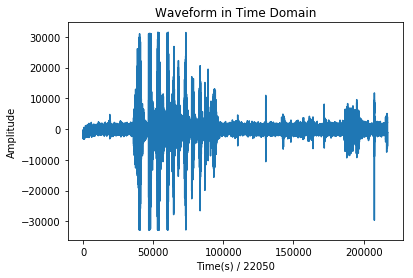

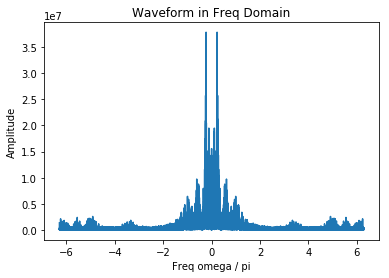

In [94]:
if __name__ == '__main__':
    f = AudioSpec("output.wav")
    f.main()